# Lab11

## 0. Prerequisite

In [1]:
!pip install mypy
from IPython.core.magic import register_cell_magic
from IPython import get_ipython
from mypy import api

@register_cell_magic
def mypy(line, cell):
  for output in api.run(['-c', '\n' + cell] + line.split()):
    if output and not output.startswith('Success'):
      raise TypeError(output)
  get_ipython().run_cell(cell)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


## Common Exception




In [3]:
abc=1
print(abc)

1


In [4]:
a = '3'
int(a)

3

In [5]:
b = '3.14'
float(b)

3.14

In [7]:
pi = '3.140'
float(pi)

d = '3.140'
float(d)

3.14

In [8]:
lst = ['hello', 'world', '3.14', '0.78']
print(lst[3])

#for l in lst:
#  print(l)

0.78


In [9]:
lst = [0, 0, '3.14', '0.78']

list(map(type, map(float, lst)))

[float, float, float, float]

In [11]:
d = {'kim': 'hello',
     'lee': 'world'}

if 'park' in d:
  d['park']

In [12]:
def f():
  a=0
  if 5 < 3:
    a = 3
  return a

print(f())


0


In [13]:
def r1():
  x = 5
  def i():
    return x
  print(x)
  return i()

def r2():
  x=5
  def i():
    x = 5
    return x
  print(x)
  return i()

r1()
r2()

5
5


5

In [ ]:
!python --version

Python 3.9.16


In [14]:
#%%mypy

from typing import Union

def to_float(n: str) -> Union[float, str]:
  try:
    return float(n)
  except ValueError:
    print('N is not a float type!')
    return n

In [ ]:
lst = ['hello', 'world', '3.14', '0.78']
number = lambda x: float(x) if x.isnumeric() else x
list(map(type, map(to_float, lst)))

N is not a float type!
N is not a float type!


[str, str, float, float]

## p3. Exception Handling (사용자 입력)

<a href="https://docs.python.org/3/library/exceptions.html#exception-hierarchy">Exception Hierarchy in Python</a>

In [ ]:
numDependents = int(input("Enter number of dependents: "))
taxCredit = 1000 * numDependents
print("Tax credit:", taxCredit)

Enter number of dependents: 3.14


ValueError: ignored

In [ ]:
try:
  numDependents = int(input("Enter number of dependents: "))
except ValueError as e:
  print("\nYou did not respond with an integer value.")
  print("We will assume your answer is zero.")
  numDependents = 0
  raise

taxCredit = 1000 * numDependents
print("Tax credit:", taxCredit)

Enter number of dependents: a

You did not respond with an integer value.
We will assume your answer is zero.


ValueError: ignored

## p8. Exception Handling (파일 처리)



In [ ]:
def main():
  '''
  Display the reciprocal of a number in a file.
  '''
  try:
    fileName = input("Enter the name of a file: ")
    infile = open(fileName, 'r')
    num = float(infile.readline())
    print(1 / num)
  except FileNotFoundError as exc1:
    print(exc1)
  except TypeError as exc2:
    print(exc2)
  except:
    print('WoW!')

main()

Enter the name of a file: hello.txt
[Errno 2] No such file or directory: 'hello.txt'


## p10. Exception Handling (사용자로부터 원하는 입력 받기??)

In [ ]:
def main():
  '''
  Request that the user enter a proper response.
  '''
  phoneticAlpha = {'a':"alpha", 'b':"bravo",'c':"charlie"}
  while True:
    try:
      letter = input("Enter a, b, or c: ")
      print(phoneticAlpha[letter])
      break
    except KeyError:
      print("Unacceptable letter was entered.")

main()

Enter a, b, or c: e
Unacceptable letter was entered.
Enter a, b, or c: f
Unacceptable letter was entered.
Enter a, b, or c: a
alpha


## p12. Exception Handling (예외는 어디서나 발생할 수 있다??)







In [ ]:
fileName = '/content/gdrive/MyDrive/Numbers.txt'
with open(fileName, 'w') as f_write:
  for i in range(1, 100+1):
    f_write.write(str(i) + '\n')

In [ ]:
!cat /content/gdrive/MyDrive/Numbers.txt

In [ ]:
from typing import List

fileName = '/content/gdrive/MyDrive/Numbers.txt'
nonExistFileName = '/content/gdrive/MyDrive/Numbers1.txt'


def calcAverage(fileName)->float:
  '''
  Calculate the average of the numbers in a file.
  '''
  total = 0
  count = 0
  foundFlag = True
  try:
    infile = open(fileName, 'r')
  except FileNotFoundError:
    print("File not found.")
    foundFlag = False
  if foundFlag:
    try:
      for line in infile:
        count += 1
        total += float(line)
      return total / count
    except ValueError:
      print("Line", count, "could not be converted to a float")
      if count > 1:
        return total / (count - 1)
      else:
        print("No average can be calculated.")
        return -1
    except ZeroDivisionError:
      print("File was empty.")
      return -1
    finally:
      infile.close()

def calcSum(fileName: str)->float:
  '''
  Calculate total of the numbers in a file.
  '''

  total, count = 0, 0
  try:
    with open(fileName, 'r') as infile:
      for line in infile:
        total += float(line)
  except FileNotFoundError as e:
    print("File not found.")
    #raise
  except ValueError as e:
    print("Line", count, "could not be converted to a float")
    #raise

  return total

def main(fileNameList : List[str]):
  for f in fileNameList:
    print(calcAverage(f))
    print(calcSum(f))

main([fileName, nonExistFileName])

50.5
5050.0
File not found.
None
File not found.
0


## p14. Selecting Random Values

In [ ]:
import random

elements = ["earth", "air", "fire", "water"]

print(random.choice(elements)) # with equal probability
print(random.sample(elements, 2))
random.shuffle(elements)
print(elements)
print(random.randint(1, 5)) # random integer from 1 to 5

earth
['earth', 'air']
['water', 'fire', 'earth', 'air']
5


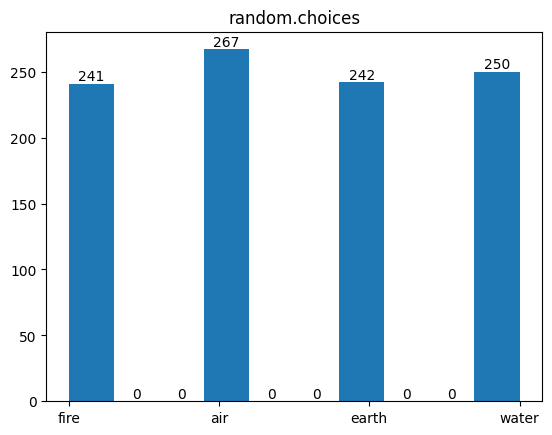

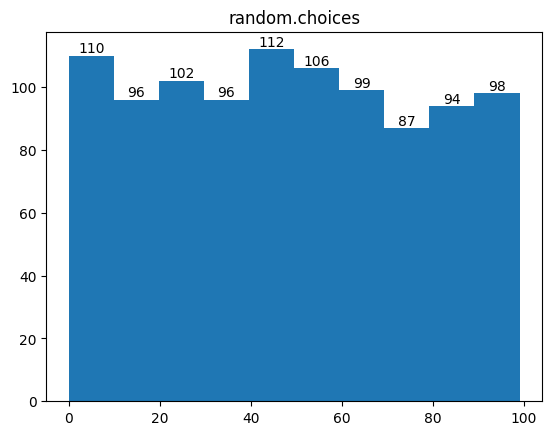

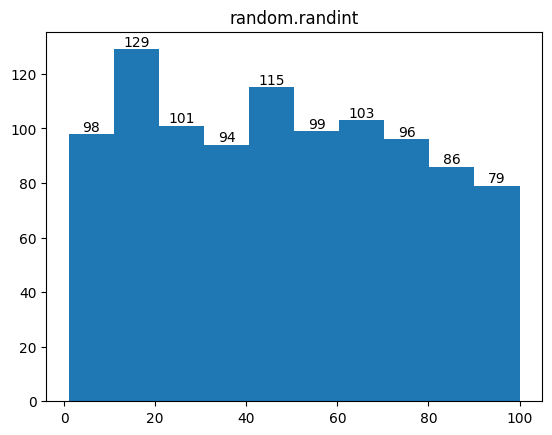

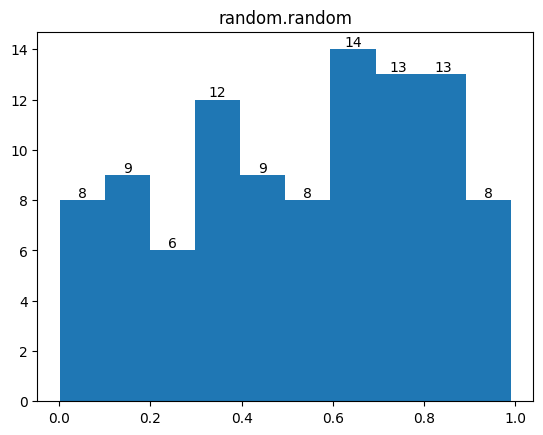

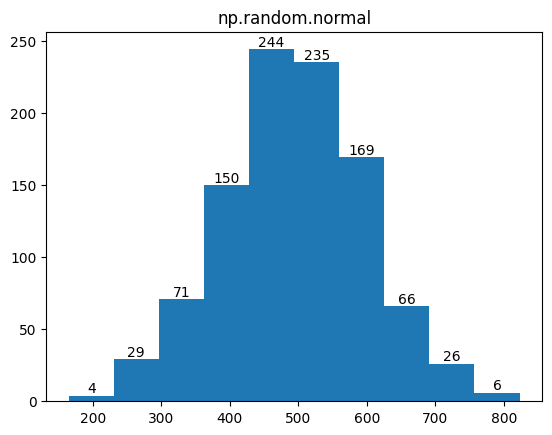

In [ ]:
import random
import numpy as np

import matplotlib.pyplot as plt
from typing import Any

#random.seed(0)

def showProbabilityAsHistogram(lst : List[Any], title: str='')->None:
  counts, edges, bars = plt.hist(lst)
  plt.bar_label(bars)
  plt.title(title)
  plt.show()

elements = ["earth", "air", "fire", "water"]
numbers = list(range(100))

# generate numbers with equal probability for each number
showProbabilityAsHistogram(random.choices(elements, k=1000), 'random.choices')

# generate numbers with equal probability for each number
showProbabilityAsHistogram(random.choices(numbers, k=1000), 'random.choices')

# generate numbers with equal probability for each number
showProbabilityAsHistogram([random.randint(1, 100) for _ in range(1000)], 'random.randint')

# generate numbers with equal probability for each number
showProbabilityAsHistogram([random.random() for _ in range(100)], 'random.random')

# random samples from a normal (Gaussian) distribution
showProbabilityAsHistogram(np.random.normal(500, 100, 1000), 'np.random.normal')

## p15. Selecting Random Values

In [ ]:
!cat /content/gdrive/MyDrive/DeckOfCardsList.dat

�]q (X   2♠qX   3♠qX   4♠qX   5♠qX   6♠qX   7♠qX   8♠qX   9♠qX   10♠q	X   J♠q
X   2♥qX   3♥qX   4♥qX   5♥qX   6♥qX   7♥qX   8♥qX   9♥qX   10♥qX   J♥qX   K♥qX   Q♥qX   A♥qX   2♣qX   3♣qX   4♣qX   5♣qX   6♣qX   7♣q X   8♣q!X   9♣q"X   10♣q#X   J♣q$X   K♣q%X   Q♣q&X   A♣q'X   2♦q(X   3♦q)X   4♦q*X   5♦q+X   6♦q,X   7♦q-X   8♦q.X   9♦q/X   10♦q0X   J♦q1X   K♦q2X   Q♦q3X   A♦q4e.

In [ ]:
import random
import pickle

fileName = '/content/gdrive/MyDrive/DeckOfCardsList.dat'

with open(fileName, 'rb') as infile:
  deckOfCards = pickle.load(infile)

print(deckOfCards)
print()
pokerHand = random.sample(deckOfCards, 5)
print(pokerHand)
random.shuffle(deckOfCards)
print(deckOfCards)

['2♠', '3♠', '4♠', '5♠', '6♠', '7♠', '8♠', '9♠', '10♠', 'J♠', 'K♠', 'Q♠', 'A♠', '2♥', '3♥', '4♥', '5♥', '6♥', '7♥', '8♥', '9♥', '10♥', 'J♥', 'K♥', 'Q♥', 'A♥', '2♣', '3♣', '4♣', '5♣', '6♣', '7♣', '8♣', '9♣', '10♣', 'J♣', 'K♣', 'Q♣', 'A♣', '2♦', '3♦', '4♦', '5♦', '6♦', '7♦', '8♦', '9♦', '10♦', 'J♦', 'K♦', 'Q♦', 'A♦']

['5♠', 'A♥', 'K♥', '8♦', 'Q♥']
['6♠', 'A♠', '9♥', 'J♥', '7♦', '9♣', '8♠', '10♦', '9♠', '2♣', '3♣', 'A♣', 'Q♣', 'K♣', 'A♥', '8♥', '4♠', 'K♥', '7♣', 'A♦', '5♦', '3♠', '5♣', 'Q♥', '6♦', '8♦', '9♦', 'K♦', 'Q♦', '4♦', '7♠', '10♣', 'K♠', '4♥', '10♥', '5♥', '10♠', '3♦', '5♠', 'J♣', '4♣', '6♣', '2♠', '6♥', 'J♦', 'J♠', '2♦', '7♥', '8♣', 'Q♠', '3♥', '2♥']


## p18. Recursion

In [ ]:
def gcd(a, b):
  if b == 0:
    return a
  return gcd(b, a%b)

def gcd2(a, b):
  while b!=0:
    a, b = b, a % b
  return a


for a, b in [ (4, 6), (10, 15), (10, 35), (20, 30), (2, 31) ]:
  print(gcd(a, b), gcd2(a, b))

2 2
5 5
5 5
10 10
1 1


## p22. Recursion

In [ ]:
def isPalindrome(word :str) -> bool:
  '''
  Convert all letters to lowercase.
  '''
  word = word.lower()
  # Words of zero or one letters are palindromes.
  if len(word) <= 1:
    return True
  elif word[0] == word[-1]: # First and last letters match.
    # Remove first and last letters.
    word = word[1:-1]
    return isPalindrome(word)
  else:
    return False

def isPalindrome2(s: str):
    # Implement your code
    # Return true if s is palladium, false otherwise.
    middle = len(s)//2
    if len(s) % 2 == 0:
      return s[:middle] == s[:middle-1:-1]
    else:
      return s[:middle] == s[:middle:-1]

def isPalindrome3(word):
    return word.lower() == word.lower()[::-1]

input_strings = ['', 'a', 'abccba', 'racecar', 'hello', 'madam', 'python', 'level', 'world']

for s in input_strings:
  print(isPalindrome(s), isPalindrome2(s), isPalindrome3(s))


True True True
True True True
True True True
True True True
False False False
True True True
False False False
True True True
False False False
